# Forecast for 2024–2026

In [9]:

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


file_path = r"C:\Users\pro\Downloads\medicare-drug-spending-analysis\data\processed\medicare_drug_spending_clean.csv"
df = pd.read_csv(file_path)


year_cols = ['Tot_Spndng_2019','Tot_Spndng_2020','Tot_Spndng_2021','Tot_Spndng_2022','Tot_Spndng_2023']
total_spending = df[year_cols].sum()


spending_series = pd.Series(total_spending.values, index=[2019, 2020, 2021, 2022, 2023])
print(spending_series)


2019    3.578828e+11
2020    3.927086e+11
2021    4.295483e+11
2022    4.806250e+11
2023    5.518490e+11
dtype: float64


In [10]:

model = ARIMA(spending_series, order=(1,1,1))  # (p,d,q)
model_fit = model.fit()


print(model_fit.summary())

forecast = model_fit.get_forecast(steps=3)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


forecast_years = [2024, 2025, 2026]
forecast_df = pd.DataFrame({
    "Year": forecast_years,
    "Forecasted_Spending": forecast_values.values,
    "Lower_CI": conf_int.iloc[:,0].values,
    "Upper_CI": conf_int.iloc[:,1].values
})

print(forecast_df)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -99.496
Date:                Tue, 05 Aug 2025   AIC                            204.992
Time:                        20:58:44   BIC                            203.151
Sample:                             0   HQIC                           200.952
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.050     20.036      0.000       0.902       1.098
ma.L1         -0.9928      1.058     -0.938      0.348      -3.066       1.081
sigma2      2.115e+20        nan        nan        n

C:\Users\pro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pro\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pro\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge

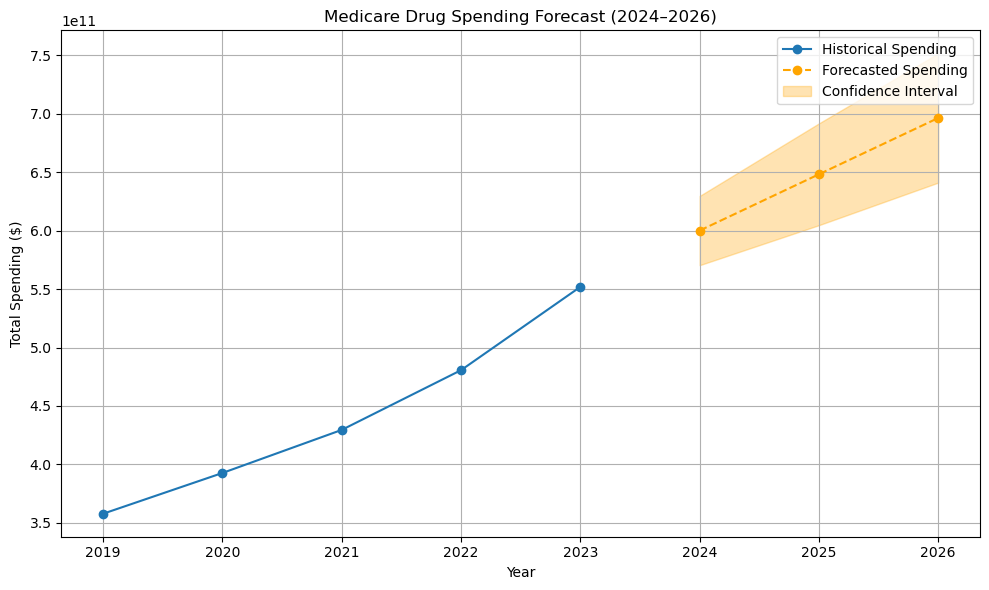

In [11]:

plt.figure(figsize=(10,6))
plt.plot(spending_series.index, spending_series.values, label="Historical Spending", marker='o')
plt.plot(forecast_years, forecast_values, label="Forecasted Spending", marker='o', linestyle='--', color='orange')
plt.fill_between(forecast_years, conf_int.iloc[:,0], conf_int.iloc[:,1], color='orange', alpha=0.3, label="Confidence Interval")

plt.title("Medicare Drug Spending Forecast (2024–2026)")
plt.xlabel("Year")
plt.ylabel("Total Spending ($)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### **Insights from Medicare Drug Spending Forecast (2024–2026)**

- **Consistent Upward Trend**:  
  Medicare drug spending has shown **steady growth** from 2019 to 2023 and is **expected to continue rising sharply** in the next 3 years.

- **Forecasted Growth**:  
  - **2024:** ~\$600B (± CI)  
  - **2025:** ~\$650B  
  - **2026:** ~\$700B  
  This indicates a **projected increase of nearly 27% between 2023 and 2026**.

- **Confidence Interval**:  
  The shaded orange region shows **uncertainty in the forecast**. Even in the **lower bound scenario**, spending still increases significantly.

- **Implications**:  
  - Policymakers should **prepare for higher Medicare budgets**.  
  - Pharma companies may experience **strong growth opportunities** in this market.  
  - The trend suggests a **potential need for drug price regulation** to manage future costs.
